In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']
%matplotlib inline

In [2]:
ex0 = pd.read_table('ex0.txt',header=None)

In [3]:
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [4]:
ex0.shape

(200, 3)

In [5]:
def get_Mat(dataSet):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [6]:
xMat,yMat=get_Mat(ex0)

In [8]:
xMat[:10]

matrix([[1.      , 0.067732],
        [1.      , 0.42781 ],
        [1.      , 0.995731],
        [1.      , 0.738336],
        [1.      , 0.981083],
        [1.      , 0.526171],
        [1.      , 0.378887],
        [1.      , 0.033859],
        [1.      , 0.132791],
        [1.      , 0.138306]])

In [9]:
yMat[:10]

matrix([[3.176513],
        [3.816464],
        [4.550095],
        [4.256571],
        [4.560815],
        [3.929515],
        [3.52617 ],
        [3.156393],
        [3.110301],
        [3.149813]])

In [15]:
def plotShow(dataSet):
    xMat,yMat=get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    plt.show()

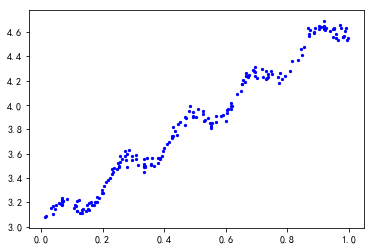

In [16]:
plotShow(ex0)

In [17]:
def standRegres(dataSet):
    xMat,yMat =get_Mat(dataSet)
    xTx = xMat.T*xMat
    if np.linalg.det(xTx)==0:                
        print('矩阵为奇异矩阵，无法求逆')
        return
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [18]:
ws=standRegres(ex0)

In [19]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [20]:
def plotReg(dataSet):
    xMat,yMat=get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    ws = standRegres(dataSet)
    yHat = xMat*ws
    plt.plot(xMat[:,1],yHat,c='r')
    plt.show()

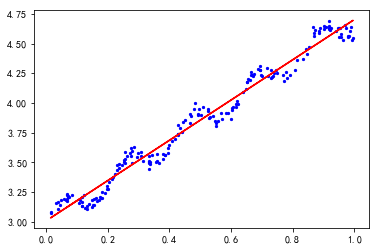

In [21]:
plotReg(ex0)

In [22]:
xMat,yMat =get_Mat(ex0)
ws=standRegres(ex0)
yHat = xMat*ws
np.corrcoef(yHat.T,yMat.T) #保证两个都是行向量

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

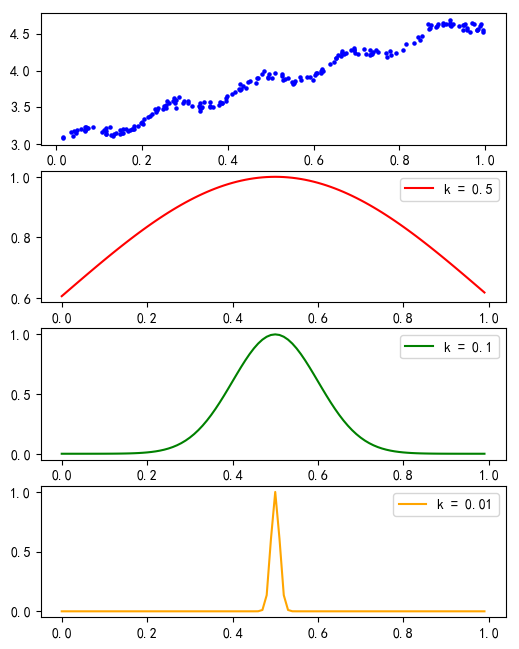

In [23]:
xMat,yMat = get_Mat(ex0)
x=0.5
xi = np.arange(0,1.0,0.01)
k1,k2,k3=0.5,0.1,0.01
w1 = np.exp((xi-x)**2/(-2*k1**2))
w2 = np.exp((xi-x)**2/(-2*k2**2))
w3 = np.exp((xi-x)**2/(-2*k3**2))
#创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
#子画布1，原始数据集
fig1 = fig.add_subplot(411)
plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
#子画布2，w=0.5
fig2 = fig.add_subplot(412)
plt.plot(xi,w1,color='r')
plt.legend(['k = 0.5'])
#子画布3，w=0.1
fig3 = fig.add_subplot(413)
plt.plot(xi,w2,color='g')
plt.legend(['k = 0.1'])
#子画布4，w=0.01
fig4 = fig.add_subplot(414)
plt.plot(xi,w3,color='orange')
plt.legend(['k = 0.01'])
plt.show()

In [25]:
def LWLR(testMat,xMat,yMat,k=1.0):
    n=testMat.shape[0]
    m=xMat.shape[0]
    weights =np.mat(np.eye(m))
    yHat = np.zeros(n)
    for i in range(n):
        for j in range(m):
            diffMat = testMat[i]-xMat[j]
            weights[j,j]=np.exp(diffMat*diffMat.T/(-2*k**2))
        xTx = xMat.T*(weights*xMat)
        if np.linalg.det(xTx)==0:
            print('矩阵为奇异矩阵，不能求逆')
            return
        ws = xTx.I*(xMat.T*(weights*yMat))
        yHat[i]= testMat[i]*ws
    return yHat

In [27]:
yHat = LWLR(xMat,xMat,yMat,k=1.0)

In [24]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
np.argsort([1,3,2])

array([0, 2, 1], dtype=int64)

In [29]:
xMat,yMat = get_Mat(ex0)
#将数据点排列（argsort()默认升序排列，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort=xMat[srtInd][:,0]

In [35]:
#计算不同k取值下的y估计值yHat
yHat1 = LWLR(xMat,xMat,yMat,k=1.0)
yHat2 = LWLR(xMat,xMat,yMat,k=0.01)
yHat3 = LWLR(xMat,xMat,yMat,k=0.003)

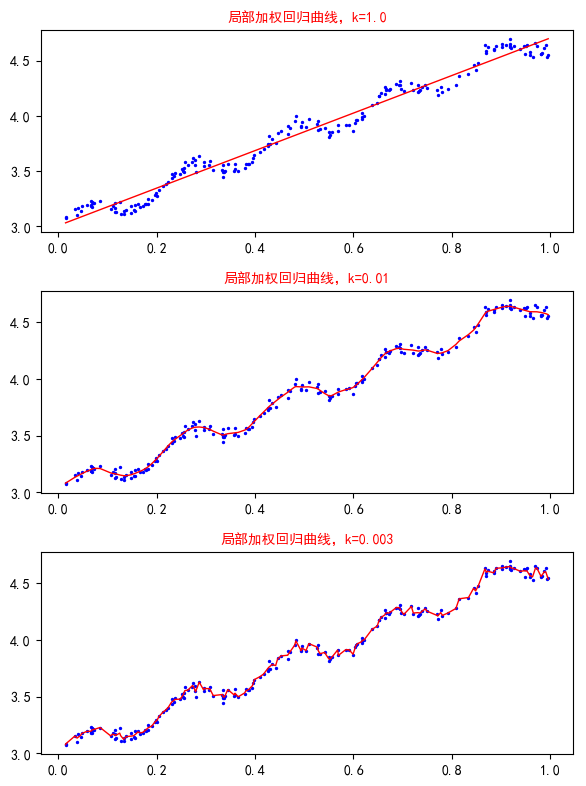

In [38]:
#创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
#子图1绘制k=1.0的曲线
fig1=fig.add_subplot(311)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat1[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=1.0',size=10,color='r')
#子图2绘制k=0.01的曲线
fig2=fig.add_subplot(312)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat2[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=0.01',size=10,color='r')
#子图3绘制k=0.003的曲线
fig3=fig.add_subplot(313)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat3[srtInd],linewidth=1,color='r')
plt.title('局部加权回归曲线，k=0.003',size=10,color='r')
#调整子图的间距
plt.tight_layout(pad=1.2)
plt.show()

In [39]:
np.corrcoef(yHat.T,yMat.T)     #最小二乘法

array([[1.        , 0.98647703],
       [0.98647703, 1.        ]])

In [40]:
np.corrcoef(yHat1.T,yMat.T)    #k=1.0模型

array([[1.        , 0.98647703],
       [0.98647703, 1.        ]])

In [41]:
np.corrcoef(yHat2.T,yMat.T)    #k=0.01模型

array([[1.       , 0.9985249],
       [0.9985249, 1.       ]])

In [42]:
np.corrcoef(yHat3.T,yMat.T)    #k=0.003模型

array([[1.        , 0.99931945],
       [0.99931945, 1.        ]])

In [43]:
abalone = pd.read_table('abalone.txt',header=None)
abalone.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']

In [44]:
abalone.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [45]:
abalone.shape

(4177, 9)

In [46]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
性别      4177 non-null int64
长度      4177 non-null float64
直径      4177 non-null float64
高度      4177 non-null float64
整体重量    4177 non-null float64
肉重量     4177 non-null float64
内脏重量    4177 non-null float64
壳重      4177 non-null float64
年龄      4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [48]:
abalone.mean()

性别      0.052909
长度      0.523992
直径      0.407881
高度      0.139516
整体重量    0.828742
肉重量     0.359367
内脏重量    0.180594
壳重      0.238831
年龄      9.933684
dtype: float64

In [49]:
def randSplit(dataSet,rate):
    m = dataSet.shape[0]
    n = int(m*rate)
    train = dataSet.iloc[:n,:]
    test = dataSet.iloc[n:m,:]
    test.index = range(test.shape[0])
    return train,test

In [51]:
train,test = randSplit(abalone,0.8)

In [52]:
train.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
train.shape

(3341, 9)

In [54]:
test.shape

(836, 9)

In [55]:
def sseCal(yMat, yHat):
    sse = ((yMat.A.flatten()-yHat)**2).sum()
    return sse

In [59]:
def showPlot(abalone):
    abX,abY = get_Mat(abalone)
    train_sse = []
    test_sse = []
    for k in np.arange(0.5,10.1,0.1):
        yHat1 = LWLR(abX[:99],abX[:99],abY[:99],k)
        sse1 = sseCal(abY[:99], yHat1)
        train_sse.append(sse1)
        
        yHat2 = LWLR(abX[100:199],abX[:99],abY[:99],k)
        sse2 = sseCal(abY[100:199], yHat2)
        test_sse.append(sse2)
    plt.plot(np.arange(0.5,10.1,0.1),train_sse,color='b')
    plt.plot(np.arange(0.5,10.1,0.1),test_sse,color='r')
    plt.xlabel('不同k取值')
    plt.ylabel('SSE')
    plt.legend(['train_sse','test_sse'])

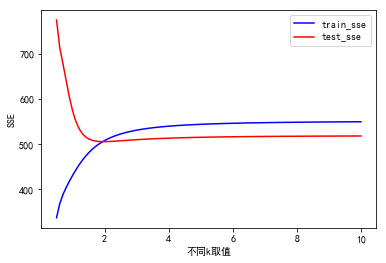

In [60]:
 showPlot(abalone)